In [1]:
# Load modules necessary
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
import pandas as pd
# %matplotlib qt
%matplotlib ipympl

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


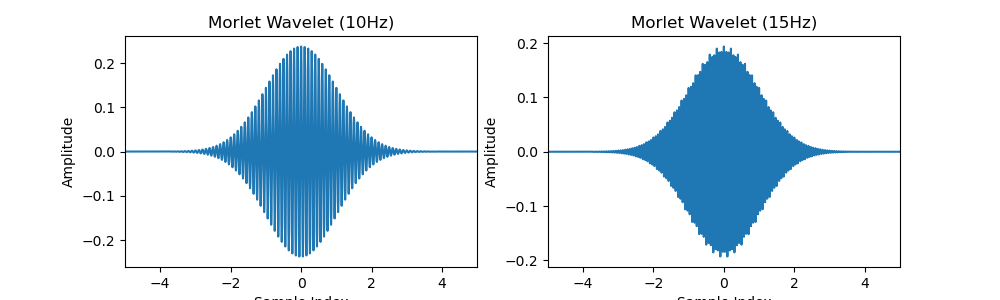

In [2]:
### MORLET WAVELETS
# Define the parameters for the Morlet wavelet
f0_10 = 10  # Central frequency of the wavelet
f0_15 = 15  # Central frequency of the wavelet
SR = 100
sigma = 1  # Standard deviation of the Gaussian window
t = np.arange(-5, 5 + 1/SR, 1/SR)  # Time vector
N_ml = len(t)

# Create the Morlet wavelet (10Hz)
A10 = 1 / (np.sqrt(sigma * np.sqrt(np.pi)) * np.sqrt(f0_10))  # amplitude scaling for the frequency-specific Morlet wavelet
morlet_wavelet10 = A10 * np.exp(2 * 1j * np.pi * f0_10 * t) * np.exp(-t**2 / (2 * sigma**2))

# Create the Morlet wavelet (15Hz)
A15 = 1 / (np.sqrt(sigma * np.sqrt(np.pi)) * np.sqrt(f0_15))  # amplitude scaling for the frequency-specific Morlet wavelet
morlet_wavelet15 = A15 * np.exp(2 * 1j * np.pi * f0_15 * t) * np.exp(-t**2 / (2 * sigma**2))

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title('Morlet Wavelet (10Hz)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.plot(t, np.real(morlet_wavelet10))
plt.xlim([t[0], t[-1]])

plt.subplot(1, 2, 2)
plt.title('Morlet Wavelet (15Hz)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.plot(t, np.real(morlet_wavelet15))
plt.xlim([t[0], t[-1]])
plt.show()

## Load EEG

In [3]:
# Path to the EEG file
eegPath = '../../Datasets/EEG/sub-01/eeg/sub-01_task-daf_eeg_filtered.vhdr'

# Load the EEG file using MNE
# MNE has different read formats for different EEG file types
# Here we are using read_raw_edf to read the EEG file
# preload=True loads the data into memory (default is False, which loads the data when needed)
raw = mne.io.read_raw_brainvision(eegPath, preload=True)
elecPos = pd.read_csv('../../Datasets/EEG/sub-01/eeg/sub-01_electrodes.tsv', sep='\t')
# Add fiducials
fiducials = pd.DataFrame({
    'name': ['Nz', 'LPA', 'RPA'],
    'x': [-4.129838157917329e-18, -0.0729282673627754, 0.08278152042487033],
    'y': [0.10011015398430487, 3.008505424862354e-18, -3.414981080487009e-18],
    'z': [-5.7777898331617076e-33, 3.851859888774472e-34, 3.4666738998970245e-33]
})

# Concatenate the original electrode positions with the fiducials
elecPos = pd.concat([elecPos, fiducials], ignore_index=True)

montage = mne.channels.make_dig_montage(
    ch_pos=dict(zip(elecPos['name'], elecPos[['x', 'y', 'z']].values)),
    coord_frame='head'
)
raw.set_montage(montage)

data = raw.get_data()
n_channels = data.shape[0]
n_samples = data.shape[1]

Extracting parameters from ../../Datasets/EEG/sub-01/eeg/sub-01_task-daf_eeg_filtered.vhdr...
Setting channel info structure...
Reading 0 ... 244237  =      0.000 ...   976.948 secs...


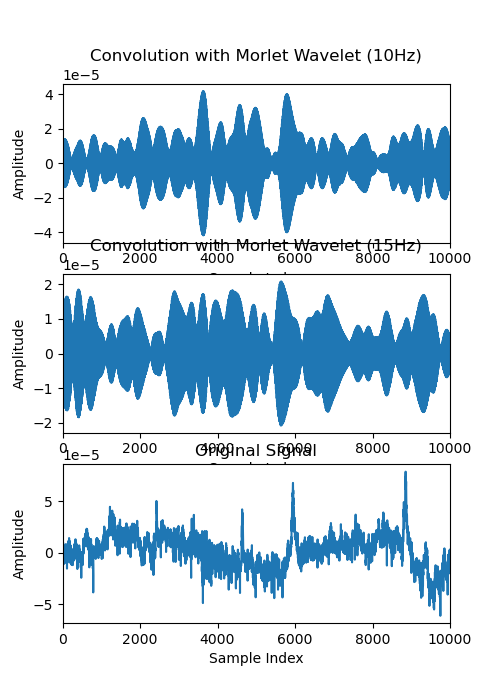

In [4]:
# convolve your EEG data with a Morlet wavelet
signal = data[2, :10000]
conv10 = np.convolve(signal, morlet_wavelet10, mode='same')
conv15 = np.convolve(signal, morlet_wavelet15, mode='same')

plt.figure(figsize=(5, 7))
plt.subplot(3, 1, 1)
plt.title('Convolution with Morlet Wavelet (10Hz)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.plot(np.real(conv10))
plt.xlim([0, len(signal)])

plt.subplot(3, 1, 2)
plt.title('Convolution with Morlet Wavelet (15Hz)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.plot(np.real(conv15),)
plt.xlim([0, len(signal)])

plt.subplot(3, 1, 3)
plt.title('Original Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.plot(signal)
plt.xlim([0, len(signal)])

plt.show()

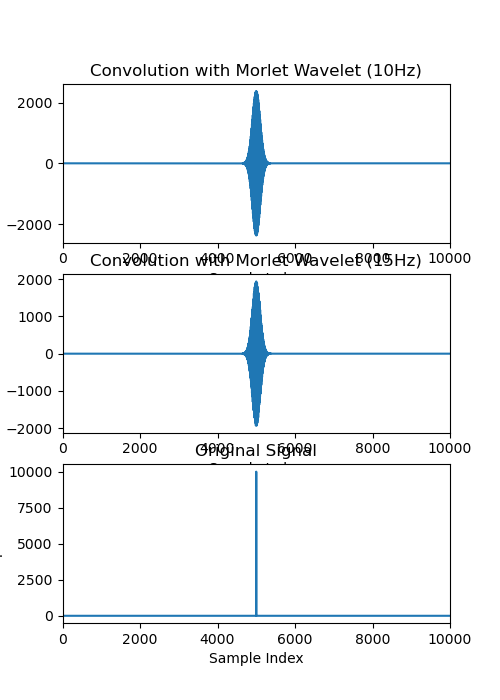

In [5]:
# add a spike to your EEG data by setting a random value to the value 10000
# what happens after you convolve your EEG with the morlet wavelet?
signal[5000] = 10000

conv10_spike = np.convolve(signal, morlet_wavelet10, mode='same')
conv15_spike = np.convolve(signal, morlet_wavelet15, mode='same')

plt.figure(figsize=(5, 7))
plt.subplot(3, 1, 1)
plt.title('Convolution with Morlet Wavelet (10Hz)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.plot(np.real(conv10_spike))
plt.xlim([0, len(signal)])

plt.subplot(3, 1, 2)
plt.title('Convolution with Morlet Wavelet (15Hz)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.plot(np.real(conv15_spike))
plt.xlim([0, len(signal)])

plt.subplot(3, 1, 3)
plt.title('Original Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.plot(signal)
plt.xlim([0, len(signal)])

plt.show()

In [6]:
=

SyntaxError: invalid syntax (1763773627.py, line 1)